<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/AI_Homework_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

750.0000000000001


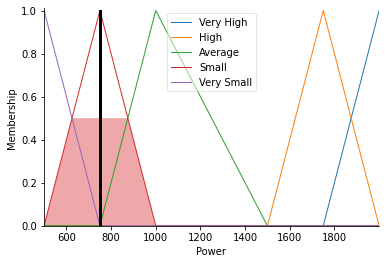

In [3]:
# bài toán nấu cơm
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,180,1),'Time')
rice = ctrl.Antecedent(np.arange(200,1000,1),'Rice')
power = ctrl.Consequent(np.arange(500,2000,1),'Power')
# Thiết lập cách giá trị
time['Very Fast'] = fuzz.trimf(time.universe,[10,10,20])
time['Fast'] = fuzz.trimf(time.universe,[10,20,50])
time['Average'] = fuzz.trimf(time.universe,[20,50,100])
time['Slow'] = fuzz.trimf(time.universe,[50,100,150])
time['Very Slow'] = fuzz.trimf(time.universe,[150,180,180])

rice['Very Much'] = fuzz.trimf(rice.universe,[800,1000,1000])
rice['Much'] = fuzz.trimf(rice.universe,[600,800,1000])
rice['Average'] = fuzz.trimf(rice.universe,[400,600,800])
rice['Less'] = fuzz.trimf(rice.universe,[200,400,600])
rice['Very Less'] = fuzz.trimf(rice.universe,[200,200,400])

power['Very High'] = fuzz.trimf(power.universe,[1750,2000,2000])
power['High'] = fuzz.trimf(power.universe,[1500,1750,2000])
power['Average'] = fuzz.trimf(power.universe,[750,1000,1500])
power['Small'] = fuzz.trimf(power.universe,[500,750,1000])
power['Very Small'] = fuzz.trimf(power.universe,[500,500,750])

#time.view()
#rice.view()
#power.view()
# Thiết lập các quy luật Membership
rule1 = ctrl.Rule(rice['Very Less'] & time['Very Slow'], power['Very Small'])
rule2 = ctrl.Rule(rice['Very Less'] & time['Slow'], power['Very Small'])
rule3 = ctrl.Rule(rice['Very Less'] & time['Average'], power['Small'])
rule4 = ctrl.Rule(rice['Very Less'] & time['Fast'], power['Average'])
rule5 = ctrl.Rule(rice['Very Less'] & time['Very Fast'], power['High'])

rule6 = ctrl.Rule(rice['Less'] & time['Very Slow'], power['Very Small'])
rule7 = ctrl.Rule(rice['Less'] & time['Slow'], power['Small'])
rule8 = ctrl.Rule(rice['Less'] & time['Average'], power['Small'])
rule9 = ctrl.Rule(rice['Less'] & time['Fast'], power['Average'])
rule10 = ctrl.Rule(rice['Less'] & time['Very Fast'], power['High'])

rule11 = ctrl.Rule(rice['Average'] & time['Very Slow'], power['Small'])
rule12 = ctrl.Rule(rice['Average'] & time['Slow'], power['Small'])
rule13 = ctrl.Rule(rice['Average'] & time['Average'], power['Average'])
rule14 = ctrl.Rule(rice['Average'] & time['Fast'], power['High'])
rule15 = ctrl.Rule(rice['Average'] & time['Very Fast'], power['High'])

rule16 = ctrl.Rule(rice['Much'] & time['Very Slow'], power['Average'])
rule17 = ctrl.Rule(rice['Much'] & time['Slow'], power['Average'])
rule18 = ctrl.Rule(rice['Much'] & time['Average'], power['High'])
rule19 = ctrl.Rule(rice['Much'] & time['Fast'], power['High'])
rule20 = ctrl.Rule(rice['Much'] & time['Very Fast'], power['Very High'])

rule21 = ctrl.Rule(rice['Very Much'] & time['Very Slow'], power['Average'])
rule22 = ctrl.Rule(rice['Very Much'] & time['Slow'], power['High'])
rule23 = ctrl.Rule(rice['Very Much'] & time['Average'], power['High'])
rule24 = ctrl.Rule(rice['Very Much'] & time['Fast'], power['Very High'])
rule25 = ctrl.Rule(rice['Very Much'] & time['Very Fast'], power['Very High'])

# Tạo giá trị để điều khiển các quy luật
CongSuat_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,
                                    rule14,rule15,rule16,rule17,rule18,rule19,
                                    rule20,rule21,rule22,rule23,rule24,rule25])
CongSuat = ctrl.ControlSystemSimulation(CongSuat_ctrl)
# Nhập điều kiện đầu vào
CongSuat.input['Time'] = 100
CongSuat.input['Rice'] = 500
CongSuat.compute()
# Xuất kết quả
print(CongSuat.output['Power'])
power.view(sim = CongSuat)